[View in Colaboratory](https://colab.research.google.com/github/sreenithy/Optical-Flow/blob/master/image_processing_assignment.ipynb)

In [0]:
# ASSIGNMENT : IMAGE PROCESSING USING PYTHON AND OPENCV

## A FEW GUIDELINES:
# There are 7 parts in this assignment. Each part has subparts indexed by (a), (b), (c),... Answer all questions. 
# Each student should work on the assignment independently. Once done, please submit the report in the form of a pdf (simply save the .ipynb with all the outputs) on Blackboard.

# In this assignment, you will learn to use functions from OpenCV in order to perform basic image processing. 
# You are provided with the starter code. You are required to answer the questions and to write a few lines of your own code in order to complete the assignment.
# The code provided can be run on Google Colaboratory -- colab.research.google.com -- with only one modification (see below). 

In [1]:
import numpy as np
import cv2                           
from matplotlib import pyplot as plt
!pip install -q imageio

import imageio
import itertools
import matplotlib.gridspec as gridspec
import random


import os

## THIS PART OF THE CODE LETS YOU USE THE FILES FROM YOUR GOOGLE DRIVE ACCOUNT
## YOU NEED NOT USE THIS IF YOU ARE NOT USING GOOGLE COLABORATORY


## ASSIGNMENT PART 1
## (a) Open this file on Google Colab
## (b) Make a folder on Google Drive in which you can store images. Upload the "cameraman.tif" provided to you
## (c) The last part of the URL will serve as the "drive_id" in the line below
## If you are unsure, you can read further here : https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

folder_id = '1ivriiYfFZvEyCW1gkyQE8abuUpCdejKY' # Enter the last part of the URL of the Google Drive folder here

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')

try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': '\'' + folder_id + "\' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)
  
os.chdir(local_download_path)

title: cameraman.tif, id: 1FFssDwy1W333sxtmh_1TlL7GD8pLbUUg
downloading to /root/data/cameraman.tif


(256, 256)


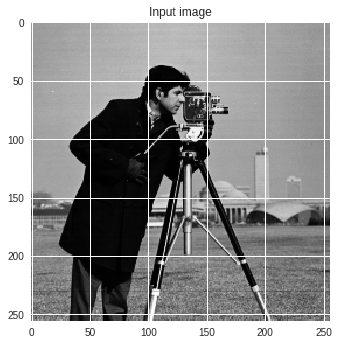

In [2]:
# Read an image
img = cv2.imread('cameraman.tif', 0) # 0 flag indicates that the image is read as grayscale
plt.imshow(img, cmap='gray')
plt.title('Input image')
print img.shape

# Additional info: As mentioned in class, OpenCV loads images in the BGR format.
# Additional info: RGB is only one of several color spaces. You can find out about other popular color spaces, their applications, and how to use them in OpenCV here: https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/


# GEOMETRIC TRANSFORMS

**ASSIGNMENT PART 2**

(a) Experiment with other scaling factors and output the resized images

(b) When we want to increase the size of the image, we are essentially adding additional values between every pair of pixels. Intuitively, these new values should be related to existing pixel values. This can be done through interpolation.  Experiment with other interpolation functions and report the results

(c) When increasing the image size, is the choice of the interpolation function important? If so, why?

When we increase the size of the image, it is also known as super-resolution. Unsurprisingly (it is 2018), deep learning works very well for this application. An example: https://arxiv.org/abs/1501.00092


The function cv2.resize(), resizes the image src down to or up to the specified size. 
It takes the following parameters:
Parameters:
1.   src – input image
2.   dst – output image
3.   dsize –output image size
4.   fx –scale factor along the horizontal axis
5.   fy –scale factor along the vertical axis; when it equals 0, it is computed as
6.   interpolation – interpolation method









'''

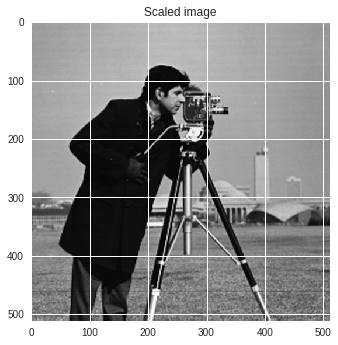

In [26]:
height, width = img.shape
img_resized = cv2.resize(img, (2*width, 2*height), interpolation=cv2.INTER_CUBIC) # Scale the image
plt.figure()
plt.imshow(img_resized,'gray')
plt.title('Scaled image')

# function to display images
def display(images,titles=['']):
    
    if isinstance(images[0], list):
        c = len(images[0])
        r = len(images)
        images = list(itertools.chain(*images))
    else:
        c = len(images)
        r = 1
    plt.figure(figsize=(4*c, 4*r))
    gs1 = gridspec.GridSpec(r, c, wspace=0, hspace=0)
    titles = itertools.cycle(titles)
    #print(r*c)
    for i in range(r*c):
        im = images[i]
        title = titles.next()
        #print(gs1[i])
        plt.subplot(gs1[i])
        plt.imshow(im, cmap='gray', interpolation='none')
        plt.axis('on')
        
        if i < c:
            plt.title(title)
    plt.tight_layout()



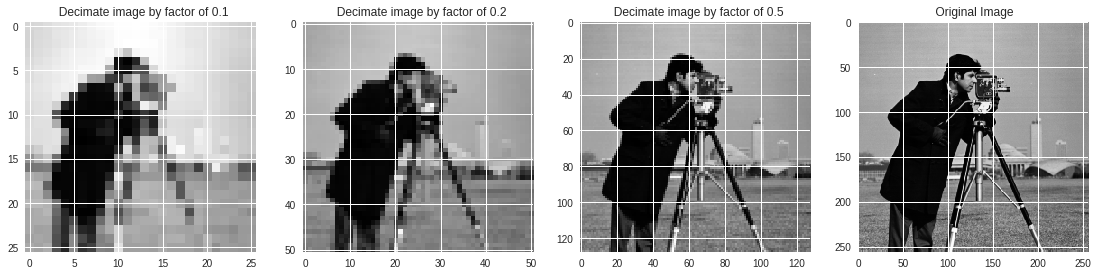

In [27]:

#(a) Experiment with other scaling factors and output the resized images
#DECIMATION
scalelist=[0.1,0.2,0.5,1]
scalelistvalue=["0.1","0.2","0.5"]
image_set = [cv2.resize(img, dsize=None,fx=s,fy=s,interpolation=cv2.INTER_AREA) for s in scalelist] 
names=["  Decimate image by factor of "+ s for s in scalelistvalue]+[" Original Image"]
display(image_set,names)
  
  



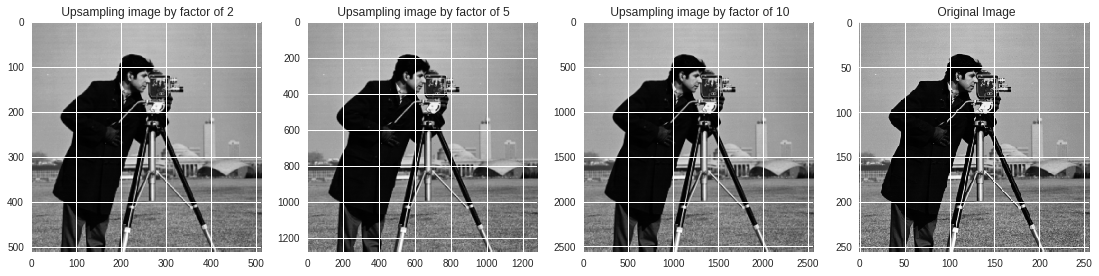

In [5]:

#INTERPOLATION
scalelist=[2,5,10,1]
scalelistvalue=["2","5","10"]
image_set = [cv2.resize(img, dsize=None,fx=s,fy=s) for s in scalelist] 
names=[" Upsampling image by factor of "+ s for s in scalelistvalue]+[" Original Image"]
display(image_set,names)




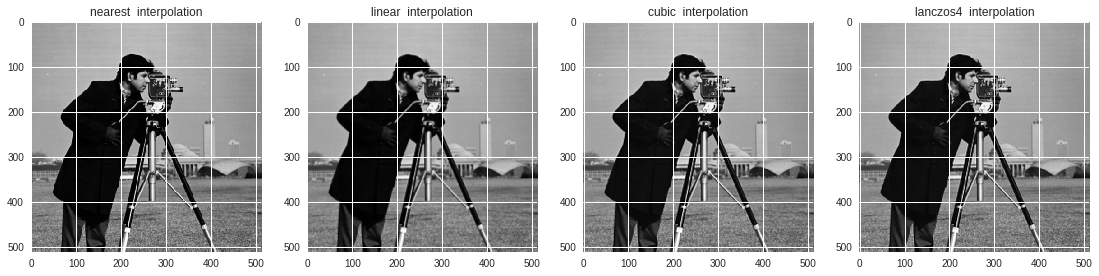

In [10]:
# interpolation methods to compare
methods=[("nearest", cv2.INTER_NEAREST), 
         ("linear", cv2.INTER_LINEAR), 
         ("cubic", cv2.INTER_CUBIC), 
         ("lanczos4", cv2.INTER_LANCZOS4),
         ]
image_set = [cv2.resize(img, (2*width, 2*height), interpolation=m[1]) for m in methods] 
names=[ m[0]+"  interpolation" for m in methods]
display(image_set,names)


## Image Rotation

**ASSIGNMENT PART 3**

 (a) Rotate the image through 25, 45 and 135 degrees, observe the outputs and report the results.
 
 (b) Which interpolation function is being used currently (by default)?
 
 (c) Why do we need to do interpolation while rotating an image?

Text(0.5,1,u'Rotated Image by angle 25')

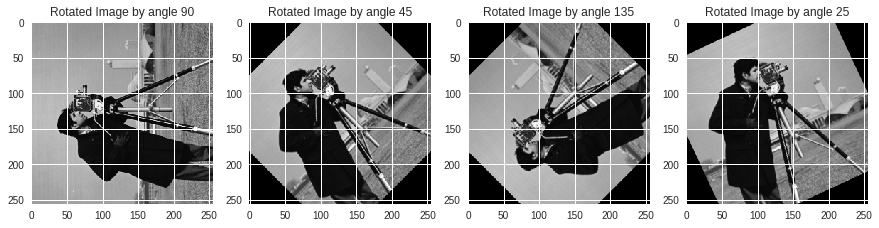

In [9]:
# Image Rotation
plt.figure(figsize=(15, 6))
plt.subplot(1, 4, 1)
M = cv2.getRotationMatrix2D((height/2,width/2),90,1) # Create a rotation matrix
img_rotated = cv2.warpAffine(img,M,(width,height))   # Rotate the image
plt.imshow(img_rotated,'gray')
plt.title('Rotated Image by angle 90')

plt.subplot(1, 4, 2)
M = cv2.getRotationMatrix2D((height/2,width/2),45,1) # Create a rotation matrix
img_rotated = cv2.warpAffine(img,M,(width,height))   # Rotate the image
plt.imshow(img_rotated,'gray')
plt.title('Rotated Image by angle 45')


plt.subplot(1, 4, 3)
M = cv2.getRotationMatrix2D((height/2,width/2),135,1) # Create a rotation matrix
img_rotated = cv2.warpAffine(img,M,(width,height))   # Rotate the image
plt.imshow(img_rotated,'gray')
plt.title('Rotated Image by angle 135')


plt.subplot(1, 4, 4)
M = cv2.getRotationMatrix2D((height/2,width/2),25,1) # Create a rotation matrix
img_rotated = cv2.warpAffine(img,M,(width,height))   # Rotate the image
plt.imshow(img_rotated,'gray')
plt.title('Rotated Image by angle 25')



# Affine and perspective transforms

**ASSIGNMENT PART 4**

Affine transforms are a more general class of transforms including rotation, translation, scaling, and shearing

(a) Experiment with other values for 'pts1' and 'pts2' and report the results. Read the documentation and try to understand the working of the cv2.warpAffine function

(b) On an image of your choice, show an example of the perspective transform using built-in functions cv2.getPerspectiveTransform and cv2.warpPerspective


Text(0.5,1,u'Affine transform')

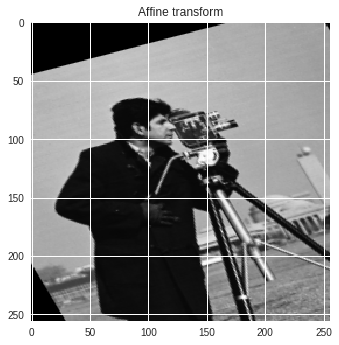

In [42]:


pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)             # Create the affine transformation matrix
img_affine = cv2.warpAffine(img,M,(width,height)) # Compute the affine transform

plt.imshow(img_affine, 'gray')
plt.title('Affine transform')



## SMOOTHING

**ASSIGNMENT PART 5**

Averaging with a box filter

(a) What happens when the filter/kernel size is increased? Remember to normalize the co-efficients. Show your experimental results. 


[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Text(0.5,1,u'Image smoothed with box filter')

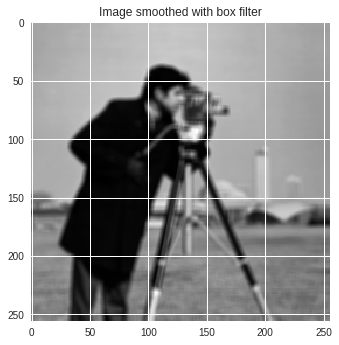

In [18]:


kernel = np.ones((5,5),np.float32)/25 # The filter/kernel size is 5x5
print kernel
img_smooth_average = cv2.filter2D(img, -1, kernel)

plt.imshow(img_smooth_average, 'gray')
plt.title('Image smoothed with box filter')



# Gaussian smoothing

** ASSIGNMENT PART 6**

As we can see, smoothing with a Gaussian filter can help in image denoising, but it also blurs the edges, which is not desirable. A better approach is to use a bilateral filter. 

(a) Read about bilateral filtering and briefly explain how a bilateral filter can preserve edges while removing the noise. The first 8-10 pages of this document provide a good reference: https://people.csail.mit.edu/sparis/bf_course/course_notes.pdf

**Bilateral Filter**

"Bilateral filtering smooths images while preserving edges, by means of a nonlinear combination of nearby image values"[[1]](http://www.cs.jhu.edu/~misha/ReadingSeminar/Papers/Tomasi98.pdf). It was given the current name by Tomasi and Manduchi in 1998.  Each pixel is
replaced by a weighted average of its neighbors.  This weight can be based on a Gaussian distribution.Each neighbor is weighted by a spatial component
that penalizes distant pixels and range component that penalizes pixels with a different
intensity. The combination of both components ensures that only nearby similar pixels contribute
to the final result. The weights are represented for the central pixel.![alt text](http://www.coldvision.io/wp-content/uploads/2016/01/bilateral_filter.jpg) . Crucially, the weights depend not only on Euclidean distance of pixels, but also on the radiometric differences (e.g. range differences, such as color intensity, depth distance, etc.). This preserves sharp edges by systematically looping through each pixel and adjusting weights to the adjacent pixels accordingly.



Text(0.5,1,u'Bilateral Filtering')

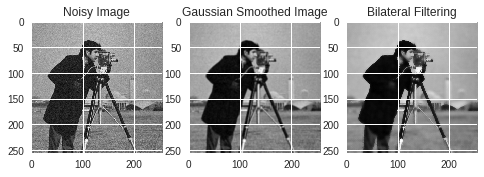

In [14]:
# Gaussian smoothing
sigma = 10.0
img_noisy = img + sigma*np.random.randn(height, width)                       # Create a noisy image by adding Gaussian noise
img_gaussian = cv2.GaussianBlur(img_noisy, (5,5) , 0)                        # Create a smoothed version of the noisy image by convolving with a Gaussian filter
img_bilateral = cv2.bilateralFilter(img_noisy.astype(np.float32), 9, 75, 75) # Smoothing using a bilateral filter

plt.subplot(1,3,1), plt.imshow(img_noisy, cmap='gray')
plt.title('Noisy Image')
plt.subplot(1,3,2), plt.imshow(img_gaussian, cmap='gray')
plt.title('Gaussian Smoothed Image')
plt.subplot(1,3,3), plt.imshow(img_bilateral, cmap='gray')
plt.title('Bilateral Filtering')

## ASSIGNMENT PART 6
# As we can see, smoothing with a Gaussian filter can help in image denoising, but it also blurs the edges, which is not desirable. A better approach is to use a bilateral filter. 
# (a) Read about bilateral filtering and briefly explain how a bilateral filter can preserve edges while removing the noise. The first 8-10 pages of this document provide a good reference: https://people.csail.mit.edu/sparis/bf_course/course_notes.pdf

 # Salt-and-pepper noise and Median Filtering
 
 **ASSIGNMENT PART 7**

*(a) What is salt-and-pepper noise?*

*Ans*. Salt-and-pepper noise/ impulse noise is caused by sharp and sudden disturbances in the image signal. It can be seen as sparsely occurring white and black pixels on the image.  In the salt & pepper noise model only two possible values are possible, a and b, and the
probability of obtaining each of them is less than 0.1. For an 8 bit/pixel image, the typical intensity value for pepper noise is
close to 0 and for salt noise is close to 255. 
Causes: The salt and pepper noise is generally caused by malfunctioning of camera’s sensor cells, by memory cell failure or by synchronization errors in the image digitizing or transmission. [1]

*(b) Add salt-and-pepper noise to your image and display the result.  We can denoise the image with salt-and-pepper noise using "median filtering" *


*(c) Apply in-built function cv2.medianBlur on the noisy image, observe and display the output*

*Ans. *  The function cv2.medianBlur() takes median of all the pixels under  the kernel area and replaces the central element with the median value. This is highly effective against salt-and-pepper noise in the images

[1](http://users.utcluj.ro/~rdanescu/PI-L10e.pdf)


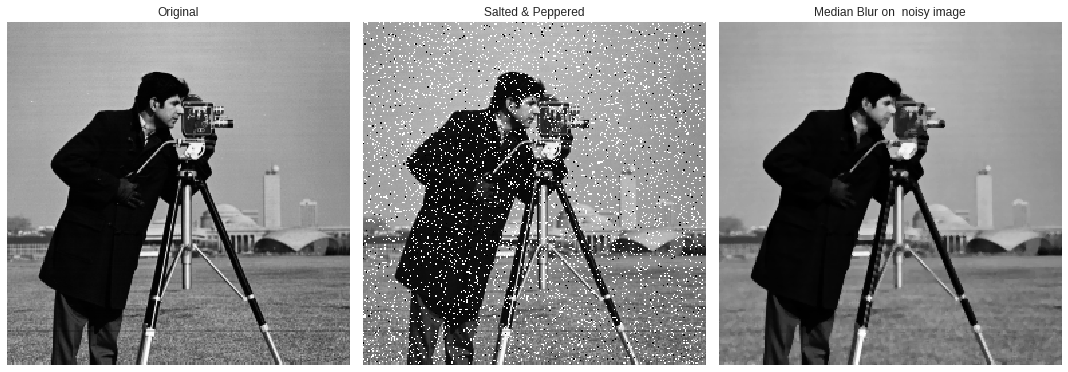

In [11]:

img=cv2.imread('cameraman.tif', 0)
rows, cols = img.shape
spr =0.9 #Salt to pepper ratio
amount = 0.09 #Total amount of the image that has salt and pepper noise
img_spr = img.copy()

num_salt = np.ceil(amount * img.size * spr)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
img_spr[coords] = 255

num_pepper = np.ceil(amount * img.size * (1 - spr))
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
img_spr[coords] = 0


#Apply median filer to remove the salt and pepper noise
img_median = cv2.medianBlur(img, 3)

# Display images
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(img_spr, cmap='gray')
plt.title('Salted & Peppered'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3)
plt.imshow(img_median, cmap='gray'), plt.title('Median Blur on  noisy image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

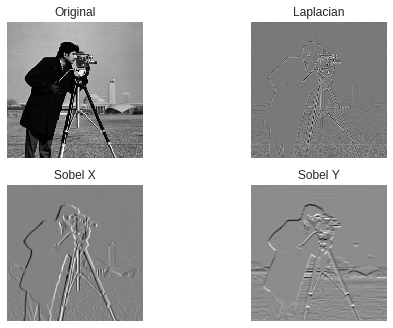

In [15]:
## GRADIENTS

laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1,0,ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()


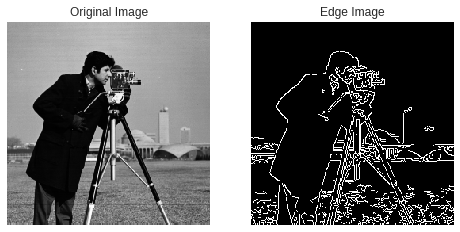

In [16]:
# Canny edge detection

edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
